# 4HDM Abelian Symmetry --- v2.0

When multi-Higgs doublet model contain more Higgs doublets, the richness of the symmetry pattern of the Higgs potential increases, and at some point, hopefully starting from 4-Higgs Doublet Model (4HDM), it is necessary to develop a computer code to handle the complexity if there are no genius mathematical insights into the model to corelate symmetry and potential without brutal-force work. 

This code is developed Precisely due to this concern. In fact, according to our observation during the process of derivation, we find out that the classification of symmetries of 4HDM is much more involved, therefore the code will be further updated to new versions if progresses are made.

The primary goals of the previous code v1.0 are: <p>
* to find out generators of cyclic abelian symmetry group of given potential
* for a given cyclic abelian generator, to find out the invariant potential
* to study one particular class of abelian symmetry of 4HDM --- symmetres which are cyclic groups: $\mathbb{Z}_8$, $\mathbb{Z}_7$, $\mathbb{Z}_6$, $\mathbb{Z}_5$, $\mathbb{Z}_4$, and classify generators and potentials up to permutation and rephasing of doublets.

The primary goal of this code v2.0 is: <p>
* provide tools to study the rest of abelian symmetry of 4HDM --- firstly, other rephasing symmetries: $\mathbb{Z}_2\times\mathbb{Z}_2$, $\mathbb{Z}_4\times\mathbb{Z}_2$, $\mathbb{Z}_2\times\mathbb{Z}_2\times\mathbb{Z}_2$, secondly, the three extra cases: $\mathbb{Z}_4\times\mathbb{Z}_4$, $\mathbb{Z}_4\times\mathbb{Z}_2\times\mathbb{Z}_2$, $\mathbb{Z}_2\times\mathbb{Z}_2\times\mathbb{Z}_2\times\mathbb{Z}_2$

As tools developed by v1.0 code is also used, we include v1.0 here.

## Packages required

This code uses NumPy, sympy, copy, itertools, and smithnormalform packages. Run the follwoing cell to import. If un successful, you need to download the package via anaconda or other means.

>for the smithnormalform package, code web: https://github.com/corbinmcneill/SNF/tree/master/smithnormalform <p>
>discription web: https://pypi.org/project/smithnormalform/ <p>
remark: small package, far less formal compared with numpy and these things, but can return matrices making the original matrix normalized <p>
'pip install smithnormalform' to install

In [28]:
import itertools
import copy
import numpy as np
from sympy import Matrix
from sympy.matrices.normalforms import smith_normal_form
from smithnormalform import matrix, snfproblem, z

## How monomials in the potentials are represented in the code

We use a list of 4 integers to represent a monomial in the Higgs potential. There are two ways to represent. One way is to store the indeces of the potential, for example: *(Remark: for quadratic terms, only the first two spots of the list are occupied)*

* $[\phi_i, \phi_j, \phi_k, \phi_l]$ **usual representation:**  $\quad(\phi_1^\dagger\phi_3)\mapsto [1,3,0,0]$ , $\;(\phi_1^\dagger \phi_2)(\phi_3^\dagger\phi_4)\mapsto [1,2,3,4]$ ,  $\;(\phi_3^\dagger \phi_2)(\phi_3^\dagger\phi_4)\mapsto [3,2,3,4]$

But in the smith normal form technique, we use another way to represent, namely, we represent a monomial by the powers of each doublet, and denote the power as minus if the doublet is conjugated. For example:

* $[c_{\phi_1}, c_{\phi_2}, c_{\phi_3}, c_{\phi_4}]$ **charge representation** : $\quad(\phi_1^\dagger\phi_3)\mapsto [-1,0,1,0]$ $\;(\phi_1^\dagger \phi_2)(\phi_3^\dagger\phi_4)\mapsto [-1,1,-1,1]$ , $\;(\phi_3^\dagger \phi_2)(\phi_3^\dagger\phi_4)\mapsto [0,1,-2,1]$ 

It is more natural to write the usual representation. The following function quickly convert the usual representation into the charge representation:

In [2]:
def convert(input_form):
    c = [0, 0, 0, 0]
    c[input_form[0]-1] -= 1
    c[input_form[1]-1] += 1
    c[input_form[2]-1] -= 1
    c[input_form[3]-1] += 1
    return c

In [3]:
# example:
convert([1,3,0,0]), convert([1,2,3,4]), convert([3,2,3,4])

([-1, 0, 1, 0], [-1, 1, -1, 1], [0, 1, -2, 1])

## How the generators of abelian groups are represented in the code

In 4HDM, generators of abelian group looks like a diagnal matrix, each element on the diagnal line is rephasing of certain doublet. We represent such generator by a list of 4 elements. Each element is the algebraic charge of the doublet.

For example: the genetator of $\mathbb{Z}_4$ : $a = \mbox{diag}(i, i, -1, 1)$ is represented by $[1,1,2,0]$ <p>
the generator of $\mathbb{Z}_4$ : $a^\prime = \sqrt{i}\cdot\mbox{diag}(i, -1, -i, 1)$ is represented by $0.5 + [1,2,3,0]$ <p> 
The overall phase factors can be ignored.

## Run the following cell

All 27 4HDM monomials that transform nontrivially will be stored in the list: **fin_li**. You can change the N parameter to get NHDM monomials that transform nontrivially under rephasing.

In [4]:
N = 4 # means 4HDM. you can change it into any positive integers.

def permute(li):
    tmp_1 = li[:4]
    tmp_2 = li[4:]
    resultLi = list(np.hstack([tmp_2, tmp_1]))
    return resultLi

def minus(list_):
    return [-ele for ele in list_]

def deleteDuplicatedElementFromList2(list):
    resultList = []
    for item in list:
        if not item in resultList:
            if not minus(item) in resultList:
                resultList.append(item)
    return resultList

def deleteDuplicatedElementFromList1(list):
    resultList = []
    for item in list:
        if not item in resultList:
            resultList.append(item)
    return resultList

def deleteDuplicatedElementFromList3(li):
    resultList = []
    for item in li:
        if not item in resultList:
            if not permute(item) in resultList:
                resultList.append(item)
    return resultList

li_2 = [[i,j,0,0] for i in range(1,N+1) for j in range(1,N+1)]
li_4 = [[i, j, k, l] for i in range(1,N+1) for j in range(1,N+1) for k in range(1,N+1) for l in range(1,N+1)]
li = li_2 + li_4
converted_li = []
for ele in li:
    converted_li.append(convert(ele))

tmp_li = deleteDuplicatedElementFromList2(converted_li)
fin_li = tmp_li[1:]

In [5]:
print("length of the list:", len(fin_li), "\n 4HDM monomials that transform nontrivially under phase rotation:")
fin_li

length of the list: 27 
 4HDM monomials that transform nontrivially under phase rotation:


[[-1, 1, 0, 0],
 [-1, 0, 1, 0],
 [-1, 0, 0, 1],
 [0, -1, 1, 0],
 [0, -1, 0, 1],
 [0, 0, -1, 1],
 [-2, 2, 0, 0],
 [-2, 1, 1, 0],
 [-2, 1, 0, 1],
 [-1, 2, -1, 0],
 [-1, 1, -1, 1],
 [-1, 2, 0, -1],
 [-1, 1, 1, -1],
 [-2, 0, 2, 0],
 [-2, 0, 1, 1],
 [-1, -1, 2, 0],
 [-1, -1, 1, 1],
 [-1, 0, 2, -1],
 [-2, 0, 0, 2],
 [-1, -1, 0, 2],
 [-1, 0, -1, 2],
 [0, -2, 2, 0],
 [0, -2, 1, 1],
 [0, -1, 2, -1],
 [0, -2, 0, 2],
 [0, -1, -1, 2],
 [0, 0, -2, 2]]

## Code that gives the potential if inputed abelian generators

For cyclic groups: change input in this cell:

In [6]:
a = [1,2,3,0] # This is the generator represented by algebraic charge. You can change it according to your need
sym = 9.      # This means Z9 group. You can change it according to your need

Then run this cell, it will output the potential symmetric under the inputed generator

In [7]:
potential_a = []

sum_charge = 0
for ele in fin_li:
    sum_charge = 0
    sum_charge = sum([ele[i]*a[i] for i in range(4)])
    if sum_charge % sym == 0:
        potential_a.append(ele)

potential_a

[[-2, 1, 0, 1], [-1, 2, -1, 0], [-1, -1, 1, 1]]

When we are dealing with abelian groups other that cyclic groups, there will be improved version of the code that take multiple generator of the abelian group and output the potential.

## Code that gives the generator of abelian symmetry if inputed the potential

Select three monomials from the potential and input it in the following cell:

In [22]:
m = Matrix([[-2, 2, 0, 0], [-1, -1, 1, 1], [-1, 0, -1, 2]]) # change the entry if you like

Run the following cell, the output is the type of symmetry. For example, if the output is 4, then the symmetry is Z4

In [32]:
a = smith_normal_form(m)
type_of_symmetry = a[2,2]
type_of_symmetry
a

Run the following code, the output is the generator represented as algebraic charge. If report error: integer division or modulo by zero, then the potential have continuous symmetry.

In [29]:
tmp = [z.Z(int(m[i])) for i in range(12)]
tmp_list = []
original_matrix = matrix.Matrix(3, 4, tmp)
prob = snfproblem.SNFProblem(original_matrix)
prob.computeSNF()
for j in range(4):
    tmp_list.append(prob.T.get(j,2).a % type_of_symmetry) 
tmp_list

**Based on the previous tools, we check all possible choices of $\mathbb{Z}_8$, $\mathbb{Z}_7$, $\mathbb{Z}_6$, $\mathbb{Z}_5$, $\mathbb{Z}_4$ generators and its invariant potential up to permutation and rephasing of doublets. We studied all distinct cases in the paper.**

## Obtaining all possible $\mathbb{Z}_n$ Symmetry generators, for $n=8,7,6,5,4$

This cell calculate all possible choices of $\mathbb{Z}_n$ generators. Duplications concerning rephasing of doublets still exist, but duplications concerning permutation fo doublets are removed. All generators are stored in the list **fin_T**

It may happen that there are many choices. In this case, one need to check whether any two are equivalent under rephasing of doublets. In later version of the code, there might be updates that help checking automatically.

Change the input in the immediate following cell, the number means $n$ in $\mathbb{Z}_n$

In [30]:
sym = 6 # means Z6. You can change it according to your need

Then run this cell, the output is all possible $\mathbb{Z}_n$ generators

In [31]:
def permutation(li):
    tmp = list(itertools.permutations(li))
    result = []
    for ele in tmp:
        result.append(list(ele))
    result = deleteDuplicatedElementFromList1(result)
    return result

def perm_eq(li1, li2):
    li1_perm = permutation(li1)
    if li2 in li1_perm:
        return True
    else:
        return False


fin_m = []
for i in range(len(fin_li)):
    for j in range(i+1, len(fin_li)):
        for k in range(j+1, len(fin_li)):
            mat = Matrix([fin_li[i], fin_li[j], fin_li[k]])
            a = smith_normal_form(mat)
            if np.abs(np.max(a)) == sym:
                fin_m.append(mat)
                
fin_T = []

for k in range(len(fin_m)):
    tmp = [z.Z(int(fin_m[k][i])) for i in range(12)]
    tmp_list = []
    original_matrix = matrix.Matrix(3, 4, tmp)
    prob = snfproblem.SNFProblem(original_matrix)
    prob.computeSNF()
    for j in range(4):
        tmp_list.append(prob.T.get(j,2).a) 
    fin_T.append(tmp_list)
    
    
# remove completely duplicated elements
for i in range(len(fin_T)):
    for j in range(4):
        fin_T[i][j] = fin_T[i][j] % sym
fin_T = deleteDuplicatedElementFromList2(fin_T)


# remove equivalent elements up to permutation of doublets
tmp = copy.deepcopy(fin_T)
list_without_perm = []

for i in range(len(fin_T)):
    for j in range(i+1, len(fin_T)):
        if perm_eq(fin_T[i], fin_T[j]):
            tmp[i] = 0
            
for ele in tmp:
    if not ele==0:
        list_without_perm.append(sorted(ele))
            
# update results
fin_T = []
fin_T = copy.deepcopy(list_without_perm)
fin_T

*Then, after removing equivalent generators up to rephasing, you can use previous code --- **Code that gives the potential if inputed abelian generators** to generate the invariant potential under these non-equvilant generators*

## Get generators of $\mathbb{Z}_2\times\mathbb{Z}_2$, $\mathbb{Z}_4\times\mathbb{Z}_2$, $\mathbb{Z}_2\times\mathbb{Z}_2\times\mathbb{Z}_2$

In [13]:
sym = 4 
symmetry_Z2_Z2_Z2 = []
symmetry_Z2_Z2_Z2_n = []
symmetry_Z2_Z4 = []
symmetry_Z2_Z4_n = []
symmetry_Z2_Z2 = []
symmetry_Z2_Z2_n = []
for i in range(len(fin_li)):
    for j in range(i+1, len(fin_li)):
        for k in range(j+1, len(fin_li)):
            matrix = Matrix([fin_li[i], fin_li[j], fin_li[k]])
            a = smith_normal_form(matrix)
            if np.abs(a[0,0])==1 and np.abs(a[1,1])==2 and np.abs(a[2,2])==2:
                symmetry_Z2_Z2.append(matrix)
                symmetry_Z2_Z2_n.append(a)
            if np.abs(a[0,0])==1 and np.abs(a[1,1])==2 and np.abs(a[2,2])==4:
                symmetry_Z2_Z4.append(matrix)
                symmetry_Z2_Z4_n.append(a)
            if np.abs(a[0,0])==2 and np.abs(a[1,1])==2 and np.abs(a[2,2])==2:
                symmetry_Z2_Z2_Z2.append(matrix)
                symmetry_Z2_Z2_Z2_n.append(a)

## Symmetry $\mathbb{Z}_2\times\mathbb{Z}_2\times\mathbb{Z}_2$

other cases, $\mathbb{Z}_2\times\mathbb{Z}_2$, and $\mathbb{Z}_4\times\mathbb{Z}_2$ are very similar

### find the list of generators, which is equvalant

In [14]:
from smithnormalform import matrix, snfproblem, z

symmetry_Z2_Z2_Z2_charge_1 = []
symmetry_Z2_Z2_Z2_charge_2 = []
symmetry_Z2_Z2_Z2_charge_3 = []

for k in range(len(symmetry_Z2_Z2_Z2)):
    tmp = [z.Z(int(symmetry_Z2_Z2_Z2[k][i])) for i in range(12)]
    tmp_list_1 = []
    tmp_list_2 = []
    tmp_list_3 = []
    original_matrix = matrix.Matrix(3, 4, tmp)
    prob = snfproblem.SNFProblem(original_matrix)
    prob.computeSNF()
    for j in range(4):
        tmp_list_1.append(prob.T.get(j,0).a)
        tmp_list_2.append(prob.T.get(j,1).a)
        tmp_list_3.append(prob.T.get(j,2).a) 
        
    symmetry_Z2_Z2_Z2_charge_1.append(tmp_list_1)
    symmetry_Z2_Z2_Z2_charge_2.append(tmp_list_2)
    symmetry_Z2_Z2_Z2_charge_3.append(tmp_list_3)
    
for i in range(len(symmetry_Z2_Z2_Z2_charge_1)):
    for j in range(4):
        symmetry_Z2_Z2_Z2_charge_1[i][j] = symmetry_Z2_Z2_Z2_charge_1[i][j] % 2

for i in range(len(symmetry_Z2_Z2_Z2_charge_2)):
    for j in range(4):
        symmetry_Z2_Z2_Z2_charge_2[i][j] = symmetry_Z2_Z2_Z2_charge_2[i][j] % 2
        
for i in range(len(symmetry_Z2_Z2_Z2_charge_3)):
    for j in range(4):
        symmetry_Z2_Z2_Z2_charge_3[i][j] = symmetry_Z2_Z2_Z2_charge_3[i][j] % 2
        
        
symmetry_Z2_Z2_Z2_charge_compact = []
for i in range(len(symmetry_Z2_Z2_Z2_charge_1)):
    tmp = np.hstack([symmetry_Z2_Z2_Z2_charge_1[i], symmetry_Z2_Z2_Z2_charge_2[i], symmetry_Z2_Z2_Z2_charge_3[i]])
    symmetry_Z2_Z2_Z2_charge_compact.append(list(tmp))
symmetry_Z2_Z2_Z2_charge_compact = deleteDuplicatedElementFromList1(symmetry_Z2_Z2_Z2_charge_compact)

Generators:
$$
a_1 = \sqrt{i}\cdot\mbox{diag}(-1,1,1,1)\,,\quad a_2 = \sqrt{i}\cdot\mbox{diag}(1,-1,1,1)\,,\quad a_3 = \sqrt{i}\cdot\mbox{diag}(1,1,-1,1)\,,\quad
$$

therefore, choose one representative, then the potential is:

In [15]:
N = 7

a1 = symmetry_Z2_Z2_Z2_charge_compact[N][0:4]
a2 = symmetry_Z2_Z2_Z2_charge_compact[N][4:8]
a3 = symmetry_Z2_Z2_Z2_charge_compact[N][8:]

potential = []

for ele in fin_li:
    sum_charge_1 = 0
    sum_charge_2 = 0
    sum_charge_3 = 0
    sum_charge_1 = sum([ele[i]*a1[i] for i in range(4)])
    sum_charge_2 = sum([ele[i]*a2[i] for i in range(4)])
    sum_charge_3 = sum([ele[i]*a3[i] for i in range(4)])
    if sum_charge_1 % 2 == 0:
        if sum_charge_2 % 2 == 0:
            if sum_charge_3 % 2 == 0:
                potential.append(ele)

potential

[[-2, 2, 0, 0],
 [-2, 0, 2, 0],
 [-2, 0, 0, 2],
 [0, -2, 2, 0],
 [0, -2, 0, 2],
 [0, 0, -2, 2]]

# Code that solves complicacted matrix equations

We give an example function which solves matrix equations in the case $\mathbb{Z}_4\times\mathbb{Z}_4$. Other generalization of this function is easily done.

In [20]:
import numpy as np
import sympy as sp
from sympy import solve
from sympy import Symbol
from sympy import *
init_printing(use_unicode=True)

def solve_equation(B):
    b11 = Symbol('b_11')
    b12 = Symbol('b_12')
    b13 = Symbol('b_13')
    b14 = Symbol('b_14')
    b21 = Symbol('b_21')
    b22 = Symbol('b_22')
    b23 = Symbol('b_23')
    b24 = Symbol('b_24')
    b31 = Symbol('b_31')
    b32 = Symbol('b_32')
    b33 = Symbol('b_33')
    b34 = Symbol('b_34')
    b41 = Symbol('b_41')
    b42 = Symbol('b_42')
    b43 = Symbol('b_43')
    b44 = Symbol('b_44')

    b = Matrix([[b11, b12, b13, b14], [b21, b22, b23, b24], [b31, b32, b33, b34], [b41, b42, b43, b44]])
    zeros = Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
    a1 = sp.sqrt(sp.I) * Matrix([[sp.I, 0, 0, 0], [0, sp.I**2, 0, 0], [0, 0, sp.I**3, 0], [0, 0, 0, sp.I**4]])
    a2 = sp.sqrt(sp.I) * Matrix([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
    list_of_b = [b11,b12,b13,b14,b21,b22,b23,b24,b31,b32,b33,b34,b41,b42,b43,b44]

    V = []
    ind = []

    for m in range(4):
        for n in range(4):

            M1 = a1*b - b*(a1**B[0,0] * a2**B[0,1])*sp.I**m
            M2 = a2*b - b*(a1**B[1,0] * a2**B[1,1])*sp.I**n

            i = 0
            Product_M1 = Matrix(np.zeros([16,16]))
            for ele in M1:
                for j in range(16):
                    Product_M1[i,j] = ele.coeff(list_of_b[j])
                i += 1

            i = 0
            Product_M2 = Matrix(np.zeros([16,16]))
            for ele in M2:
                for j in range(16):
                    Product_M2[i,j] = ele.coeff(list_of_b[j])
                i += 1

            M = Product_M1.col_join(Product_M2)
            M_null_space = M.nullspace()
            if not len(M_null_space)==0:
                for ele in M_null_space:
                    V.append(ele)
                    ind.append([m,n])

                
    Result_b = []

    for i in range(len(V)):
        M_tmp = Matrix([[V[i][0],V[i][1],V[i][2],V[i][3]], 
                        [V[i][4],V[i][5],V[i][6],V[i][7]],
                        [V[i][8],V[i][9],V[i][10],V[i][11]],
                        [V[i][12],V[i][13],V[i][14],V[i][15]]])
        Result_b.append(M_tmp)
        
    return Result_b, ind

example: find $PSU(4)$ representation of the given $GL(2,\mathbb{Z}_4)$ matrix; output a lot of solutions, mang of which represents the same element in $PSU(4)$.

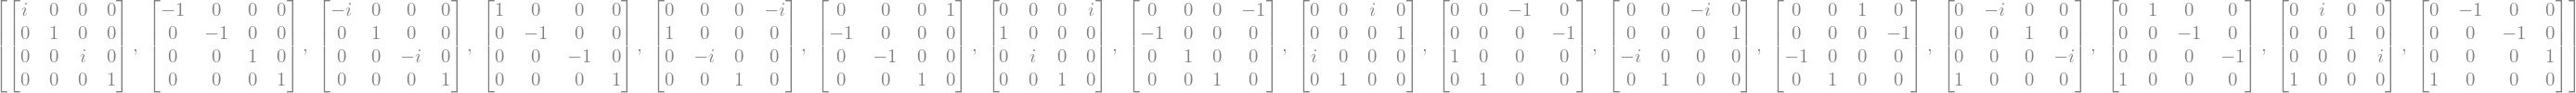

In [35]:
Result, ind = solve_equation(np.array([[1,0], [2,1]]))
Result

## find coefficients relations for $\mathbb{Z}_4\times\mathbb{Z}_4$

all possible combinaitons of two rephasing transformations, $a_1$, $a_2$ both of order 4, will lead to continuous symmetry. In fact, the 4HDM $\mathbb{Z}_4\times\mathbb{Z}_4$ symmetry which don't lead to larger symmetries is rather paticuliar, with generators looking like this. They commute in $PSU(4)$

$$
a_1 = \sqrt{i}\cdot
\begin{pmatrix}
i & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -i & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
\;,\quad
a_2 = \sqrt{i}\cdot
\begin{pmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
1 & 0 & 0 & 0 \\
\end{pmatrix}
$$

the invariant potental looks like this:

$$
V(\mathbb{Z}_4\times\mathbb{Z}_4) = \sum_{i=0}^{10}\,r_i\,W_i
$$

where $r_i\in \mathbb{R}$, and
$$
\begin{aligned}
& W_0 = (\phi_1^\dagger\phi_1) + (\phi_2^\dagger\phi_2) + (\phi_3^\dagger\phi_3) + (\phi_4^\dagger\phi_4)\\
& W_1 = W_0^2\\
& W_2 = (\phi_1^\dagger\phi_1)(\phi_1^\dagger\phi_1) + (\phi_1^\dagger\phi_1)(\phi_2^\dagger\phi_2) + (\phi_1^\dagger\phi_1)(\phi_3^\dagger\phi_3) + (\phi_1^\dagger\phi_1)(\phi_4^\dagger\phi_4) + (\phi_1^\dagger\phi_2)(\phi_2^\dagger\phi_1) + (\phi_1^\dagger\phi_3)(\phi_3^\dagger\phi_1) + (\phi_1^\dagger\phi_4)(\phi_4^\dagger\phi_1) + (\phi_2^\dagger\phi_2)(\phi_2^\dagger\phi_2) + (\phi_2^\dagger\phi_2)(\phi_3^\dagger\phi_3) + (\phi_2^\dagger\phi_2)(\phi_4^\dagger\phi_4) + (\phi_2^\dagger\phi_3)(\phi_3^\dagger\phi_2) + (\phi_2^\dagger\phi_4)(\phi_4^\dagger\phi_2) + (\phi_3^\dagger\phi_3)(\phi_3^\dagger\phi_3) + (\phi_3^\dagger\phi_3)(\phi_4^\dagger\phi_4) + (\phi_3^\dagger\phi_4)(\phi_4^\dagger\phi_3) + (\phi_4^\dagger\phi_4)(\phi_4^\dagger\phi_4)\\\\
& W_3 = (\phi_1^\dagger\phi_1)(\phi_3^\dagger\phi_3) + (\phi_2^\dagger\phi_2)(\phi_4^\dagger\phi_4)\\
& W_4 = (\phi_1^\dagger\phi_3)(\phi_3^\dagger\phi_1) + (\phi_2^\dagger\phi_4)(\phi_4^\dagger\phi_2)\\
& W_5 = (\phi_1^\dagger\phi_2)(\phi_1^\dagger\phi_4) + (\phi_2^\dagger\phi_1)(\phi_2^\dagger\phi_3) + (\phi_3^\dagger\phi_2)(\phi_3^\dagger\phi_4) + (\phi_4^\dagger\phi_1)(\phi_4^\dagger\phi_3)\\
& W_6 = (\phi_1^\dagger\phi_2)(\phi_3^\dagger\phi_2) + (\phi_1^\dagger\phi_4)(\phi_3^\dagger\phi_4) + (\phi_2^\dagger\phi_1)(\phi_4^\dagger\phi_1) + (\phi_2^\dagger\phi_3)(\phi_4^\dagger\phi_3)\\
& W_7 = (\phi_1^\dagger\phi_2)(\phi_2^\dagger\phi_1) + (\phi_1^\dagger\phi_4)(\phi_4^\dagger\phi_1) + (\phi_2^\dagger\phi_3)(\phi_3^\dagger\phi_2) + (\phi_3^\dagger\phi_4)(\phi_4^\dagger\phi_3)\\
& W_8 = (\phi_1^\dagger\phi_3)^2 + (\phi_2^\dagger\phi_4)^2 + (\phi_3^\dagger\phi_1)^2 + (\phi_4^\dagger\phi_2)^2\\
& W_9 = (\phi_1^\dagger\phi_2)(\phi_4^\dagger\phi_3) + (\phi_1^\dagger\phi_4)(\phi_2^\dagger\phi_3) + (\phi_2^\dagger\phi_1)(\phi_3^\dagger\phi_4) + (\phi_3^\dagger\phi_2)(\phi_4^\dagger\phi_1)\\
& W_{10} = (\phi_1^\dagger\phi_3)(\phi_2^\dagger\phi_4) + (\phi_1^\dagger\phi_3)(\phi_4^\dagger\phi_2) + (\phi_2^\dagger\phi_4)(\phi_3^\dagger\phi_1) + (\phi_3^\dagger\phi_1)(\phi_4^\dagger\phi_2)\\
\end{aligned}
$$

among them, $r_0W_0 + r_1W_1 + r_2W_2$ is invariant under $SU(4)$, which need not to be considered. terms that need to be considered are $i=3,4,5,6,7,8,9,10$. If further symmetries are imposed, there will be relations among coefficients $r_3\sim r_{10}$

In [33]:
# run the following code

import numpy as np

phi_quadratic = {}
phi_quartic = {}
phi_quartic_list = []

count = 1
for i in range(1,5):
    for j in range(1,5):
        phi_quadratic[count] = [i,j]#Phi_d[i]*Phi[j]
        count += 1
        
count = 1
for i in range(1,5):
    for j in range(1,5):
        for k in range(1,5):
            for l in range(1,5):
                tmp = [i,j,k,l]#Phi_d[i]*Phi[j]*Phi_d[k]*Phi[l]
                tmp_tr = [k,l,i,j] #Phi_d[k]*Phi[l]*Phi_d[i]*Phi[j]
                if tmp_tr in phi_quartic_list:
                    continue
                else:
                    phi_quartic_list.append([i,j,k,l]) #append((Phi_d[i]*Phi[j])*(Phi_d[k]*Phi[l]))
                    count += 1
                    
for n in range(len(phi_quartic_list)):
    phi_quartic[n] = phi_quartic_list[n]
    

r3 = Symbol('r_3')
r4 = Symbol('r_4')
r5 = Symbol('r_5')
r6 = Symbol('r_6')
r7 = Symbol('r_7')
r8 = Symbol('r_8')
r9 = Symbol('r_9')
r10 = Symbol('r_10')


phi_quartic_list_old = [[1,1,3,3], [2,2,4,4], 
                        [1,3,3,1], [2,4,4,2], 
                        
                        [1,2,4,3], [1,4,2,3], [2,1,3,4], [3,2,4,1], 
                        [1,3,2,4], [1,3,4,2], [2,4,3,1], [3,1,4,2],
                        [1,2,2,1], [1,4,4,1], [2,3,3,2], [3,4,4,3], 
                        [1,3,1,3], [2,4,2,4], [3,1,3,1], [4,2,4,2], 
                        
                        [1,2,1,4], [2,1,2,3], [3,2,3,4], [4,1,4,3], 
                        [1,2,3,2], [1,4,3,4], [2,1,4,1], [2,3,4,3],]

phi_quartic = {0:r3, 1:r3, 
               2:r4, 3:r4, 
               4:r5, 5:r5, 6:r5, 7:r5, 
               8:r6, 9:r6, 10:r6, 11:r6, 
               12:r7, 13:r7, 14:r7, 15:r7, 
               16:r8, 17:r8, 18:r8, 19:r8, 
               20:r9+sp.I*r10, 21:r9+sp.I*r10, 22:r9+sp.I*r10, 23:r9+sp.I*r10, #24:r9, 25:r9, 26:r9, 27:r9,
               24:r9-sp.I*r10, 25:r9-sp.I*r10, 26:r9-sp.I*r10, 27:r9-sp.I*r10, #32:-sp.I*r10, 33:-sp.I*r10, 34:-sp.I*r10, 35:-sp.I*r10, 
              }

phi_quartic_coeff = [phi_quartic[n] for n in range(len(phi_quartic_list_old))]

def find_relation_among_coeff(b_):
    N = len(phi_quartic_coeff)

    Y = Matrix(np.zeros([N,136]))

    for n in range(len(phi_quartic_list_old)):
        [i,j,k,l] = phi_quartic_list_old[n]
        tmp_i = b_[i-1,:]
        tmp_j = b_[j-1,:]
        tmp_k = b_[k-1,:]
        tmp_l = b_[l-1,:]
        for i1 in range(1,5):
            for j1 in range(1,5):
                for k1 in range(1,5):
                    for l1 in range(1,5):
                        tmp_list1 = [i1,j1,k1,l1] 
                        if tmp_list1 in phi_quartic_list:
                            index = phi_quartic_list.index(tmp_list1)
                            Y[n,index] += phi_quartic_coeff[n] * nsimplify(conjugate(tmp_i[i1-1])*tmp_j[j1-1]*conjugate(tmp_k[k1-1])*tmp_l[l1-1])
                        elif [k1,l1,i1,j1] in phi_quartic_list:
                            tmp_list1 = [k1,l1,i1,j1]
                            index = phi_quartic_list.index(tmp_list1)
                            Y[n,index] += phi_quartic_coeff[n] * nsimplify(conjugate(tmp_i[i1-1])*tmp_j[j1-1]*conjugate(tmp_k[k1-1])*tmp_l[l1-1])
                        else:
                            continue


    equations = []

    for n in range(136):
        if not phi_quartic_list[n] in phi_quartic_list_old:
            equations.append(sum(Y[:,n]))
        else:
            equations.append(sum(Y[:,n]) - phi_quartic_coeff[phi_quartic_list_old.index(phi_quartic_list[n])])

    return solve(equations, rational=True)

example: coefficient relation of matrix Result[2] is $r_{9} = r_{10} = 0$

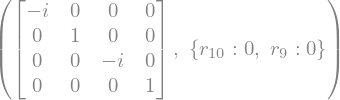

In [37]:
Result[2], find_relation_among_coeff(Result[2])